1. Importing libraries, Loading the dataset and displaying the first few rows:

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load the dataset from your local drive
df = pd.read_csv(r'C:\Users\akram\Downloads\road_saftety_data.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())


  collision_index  collision_year collision_reference  vehicle_reference  \
0   2023010419171            2023            10419171                  1   
1   2023010419183            2023            10419183                  1   
2   2023010419183            2023            10419183                  2   
3   2023010419183            2023            10419183                  3   
4   2023010419189            2023            10419189                  1   

   vehicle_type  towing_and_articulation  vehicle_manoeuvre  \
0            11                        0                  4   
1            11                        0                 18   
2             9                        0                  9   
3             9                        0                  8   
4             9                        0                 18   

   vehicle_direction_from  vehicle_direction_to  \
0                       1                     5   
1                       5                     1   
2          

C:\Users\akram\AppData\Local\Temp\ipykernel_15584\2851975324.py:10: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\akram\Downloads\road_saftety_data.csv')


2. Getting the total number of rows and columns in the safty dataset:

In [3]:
total_rows, total_columns = df.shape
print(f"Total rows: {total_rows}, Total columns: {total_columns}")

Total rows: 89494, Total columns: 28


3. Extracting the number of missing values:

In [4]:
missing_values = df.isnull().sum()
print(f"{missing_values}")

collision_index                     0
collision_year                      0
collision_reference                 0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_decile                   0
driver_home_

4. Represnting the number of unique values in each column compared to the total numeber to beter understand the data:

In [5]:
unique_values = df.nunique()
total_values = df.count()

unique_vs_total = pd.DataFrame({
    'Unique Values': unique_values,
    'Total Values': total_values
})

print("Unique vs Total values in each column:")
print(unique_vs_total)

Unique vs Total values in each column:
                                  Unique Values  Total Values
collision_index                           49316         89494
collision_year                                1         89494
collision_reference                       49316         89494
vehicle_reference                            23         89494
vehicle_type                                 22         89494
towing_and_articulation                       8         89494
vehicle_manoeuvre                            20         89494
vehicle_direction_from                       11         89494
vehicle_direction_to                         11         89494
vehicle_location_restricted_lane             12         89494
junction_location                            11         89494
skidding_and_overturning                      8         89494
hit_object_in_carriageway                    14         89494
vehicle_leaving_carriageway                  11         89494
hit_object_off_carriageway     

5. Gathering descriptive statistics for numerical columns (mean, median, std, etc.)

In [6]:
descriptive_stats = df.describe()
print("\nDescriptive statistics:")
print(descriptive_stats)


Descriptive statistics:
       collision_year  vehicle_reference  vehicle_type  \
count         89494.0       89494.000000  89494.000000   
mean           2023.0           1.569010     12.369801   
std               0.0           4.581686     18.048103   
min            2023.0           1.000000     -1.000000   
25%            2023.0           1.000000      9.000000   
50%            2023.0           1.000000      9.000000   
75%            2023.0           2.000000      9.000000   
max            2023.0         992.000000     99.000000   

       towing_and_articulation  vehicle_manoeuvre  vehicle_direction_from  \
count             89494.000000       89494.000000            89494.000000   
mean                  0.244061          20.964210                4.388428   
std                   1.443180          26.057759                2.834200   
min                  -1.000000          -1.000000               -1.000000   
25%                   0.000000           8.000000                2.

6. Number of distinct categories in categorical columns:

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
distinct_categories = {col: df[col].nunique() for col in categorical_columns}
print("\nDistinct categories in categorical columns:")
print(distinct_categories)


Distinct categories in categorical columns:
{'collision_index': 49316, 'collision_reference': 49316, 'lsoa_of_driver': 27268}


7. Get data types of each column:

In [8]:
# 
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)


Data types of each column:
collision_index                     object
collision_year                       int64
collision_reference                 object
vehicle_reference                    int64
vehicle_type                         int64
towing_and_articulation              int64
vehicle_manoeuvre                    int64
vehicle_direction_from               int64
vehicle_direction_to                 int64
vehicle_location_restricted_lane     int64
junction_location                    int64
skidding_and_overturning             int64
hit_object_in_carriageway            int64
vehicle_leaving_carriageway          int64
hit_object_off_carriageway           int64
first_point_of_impact                int64
vehicle_left_hand_drive              int64
journey_purpose_of_driver            int64
sex_of_driver                        int64
age_of_driver                        int64
age_band_of_driver                   int64
engine_capacity_cc                   int64
propulsion_code           

8. Functional dependency approximation using correlation and uniqueness:

In [9]:
def check_dependency(df, col1, col2):
    if df.groupby(col1)[col2].nunique().max() == 1:
        return True
    return False

potential_fds = []
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2 and check_dependency(df, col1, col2):
            potential_fds.append((col1, col2))

print("\nPotential functional dependencies (if one column determines another):")
print(potential_fds)



Potential functional dependencies (if one column determines another):
[('collision_index', 'collision_year'), ('collision_index', 'collision_reference'), ('collision_index', 'generic_make_model'), ('collision_year', 'generic_make_model'), ('collision_reference', 'collision_index'), ('collision_reference', 'collision_year'), ('collision_reference', 'generic_make_model'), ('vehicle_reference', 'collision_year'), ('vehicle_reference', 'generic_make_model'), ('vehicle_type', 'collision_year'), ('vehicle_type', 'generic_make_model'), ('towing_and_articulation', 'collision_year'), ('towing_and_articulation', 'generic_make_model'), ('vehicle_manoeuvre', 'collision_year'), ('vehicle_manoeuvre', 'generic_make_model'), ('vehicle_direction_from', 'collision_year'), ('vehicle_direction_from', 'generic_make_model'), ('vehicle_direction_to', 'collision_year'), ('vehicle_direction_to', 'generic_make_model'), ('vehicle_location_restricted_lane', 'collision_year'), ('vehicle_location_restricted_lane',

9. Get the PCA to be able to choose the attributes that explainmost of the variance:

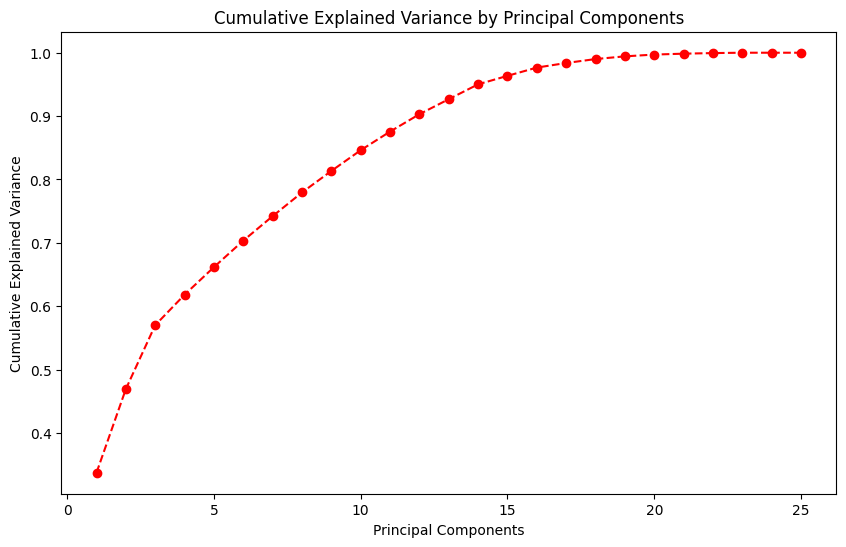

The first 12 principal components explain 0.90 of the total variance.
Top 12 contributing features across all principal components:
first_point_of_impact        2.556546
towing_and_articulation      2.475783
journey_purpose_of_driver    2.369187
vehicle_type                 2.176702
sex_of_driver                2.027522
driver_imd_decile            1.906345
vehicle_direction_from       1.859658
age_of_driver                1.851286
junction_location            1.801110
vehicle_direction_to         1.765420
driver_home_area_type        1.589232
age_band_of_driver           1.575238
dtype: float64


In [10]:

# Step 1: Selecting only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 3: Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Step 4: Calculate the explained variance for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


# Retain the first 12 components that explain the most variance
pca = PCA(n_components=12)

# Fit PCA on the scaled data
pca_result = pca.fit_transform(scaled_data)

# Now, 'pca_result' contains the data reduced to 12 principal components

# Get the contributions of each feature to each principal component:
contributions = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(12)], index=numeric_df.columns)



# Get the variance explained by the first 12 components
variance_explained_by_first_12 = explained_variance_ratio[:12].sum()

# Print the result
print(f"The first 12 principal components explain {variance_explained_by_first_12:.2f} of the total variance.")


# Calculate the total contribution of each feature across all 12 principal components (sum of absolute values)
total_contribution = contributions.abs().sum(axis=1)

# Sort features by total contribution across all components
sorted_contribution = total_contribution.sort_values(ascending=False)

# Select the top 12 contributing features
top_12_features = sorted_contribution.head(12)

# Print the top 12 features and their total contribution
print("Top 12 contributing features across all principal components:")
print(top_12_features)


In [11]:
# List of the top 12 features you want to retain in the new dataset
top_12_columns = [
    'first_point_of_impact',
    'towing_and_articulation',
    'journey_purpose_of_driver',
    'vehicle_type',
    'sex_of_driver',
    'driver_imd_decile',
    'vehicle_direction_from',
    'age_of_driver',
    'junction_location',
    'vehicle_direction_to',
    'driver_home_area_type',
    'age_band_of_driver'
]

# Create a new DataFrame with only these columns
new_dataset = df[top_12_columns]



10. Correlation matrix (for the new dataset selected with the PCA):

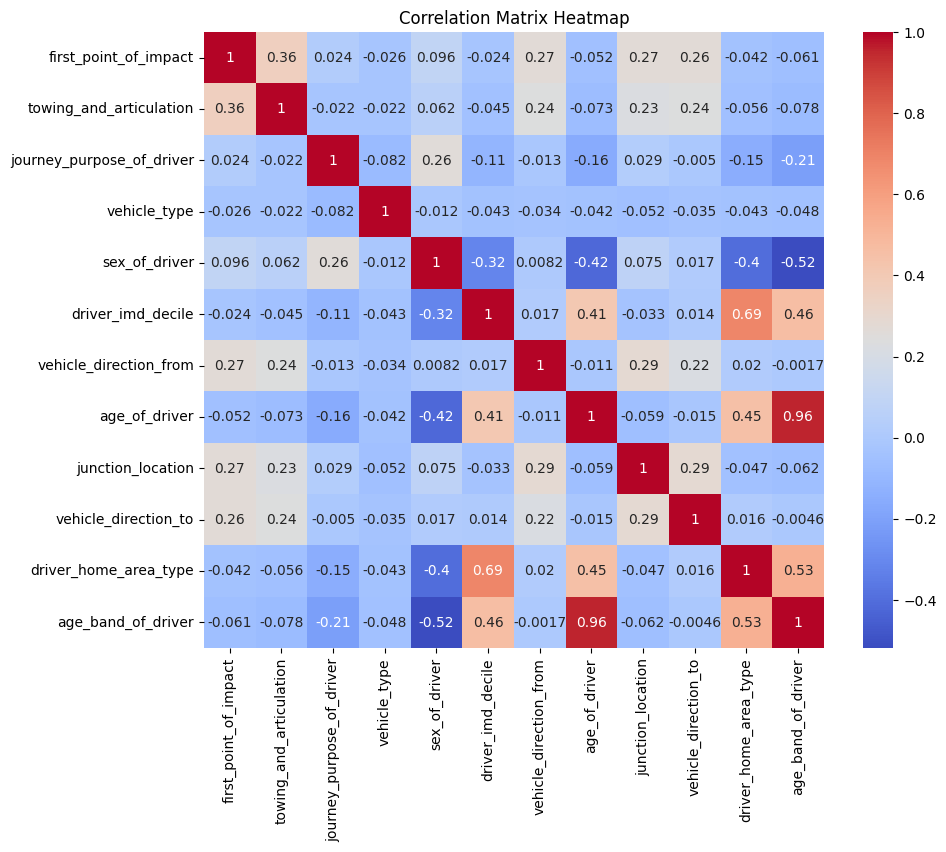

In [12]:
numeric_df = new_dataset.select_dtypes(include=['int64', 'float64'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()
